### import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### explore the data

In [2]:
df = pd.read_csv('../../zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
# function to calculate the percentage of missing values
def missing_percentage(df):
    total = df.isna().sum()[df.isna().sum() != 0]
    percent = round(total/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [5]:
missing_percentage(df)

,Total,Percent
rate,7775,15.03
phone,1208,2.34
location,21,0.04
rest_type,227,0.44
dish_liked,28078,54.29
cuisines,45,0.09
approx_cost(for two people),346,0.67


In [6]:
# function to show number of unique values in each column
def unique_values(df):
    num = df.nunique()
    percent = round(num/len(df)*100,2)
    return pd.concat([num, percent], axis=1, keys=['number','Percent'])
unique_values(df)   

,number,Percent
url,51717,100.00
address,11495,22.23
name,8792,17.00
online_order,2,0.00
book_table,2,0.00
rate,64,0.12
votes,2328,4.50
phone,14926,28.86
location,93,0.18
rest_type,93,0.18


In [7]:
len(df[df['menu_item'] == '[]'])

39617

In [8]:
df['listed_in(type)'].value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in(type), dtype: int64

In [9]:
df['location'].nunique()

93

In [10]:
df['listed_in(city)'].nunique()

30

In [11]:
df[df['listed_in(city)'] != df['location']]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
29,https://www.zomato.com/bangalore/srinathjis-ca...,"112, Bull Temple Road,next to more Basavanagud...",Srinathji's Cafe,No,No,3.8/5,148,080 26600704\r\n+91 9342593424,Basavanagudi,"Casual Dining, Cafe","Paratha, Sandwich, Chilli Idli, Noodles, Sandw...","North Indian, Cafe, Chinese, Fast Food",550,"[('Rated 5.0', 'RATED\n No words for the pane...",[],Cafes,Banashankari
30,https://www.zomato.com/bangalore/redberrys-bas...,"30, Surveyor Street, DVG Road, Basavanagudi, B...",Redberrys,Yes,No,4.0/5,219,+91 9148421256,Basavanagudi,Cafe,"Pizza, Fries, Anjeer Ice Cream, Sandwiches, Ge...","Cafe, Italian",600,"[('Rated 4.0', ""RATED\n Redberrys will provid...",[],Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,NaN,North Indian,400,[],[],Dine-out,Whitefield
51645,https://www.zomato.com/bangalore/raapchick-bro...,"Opposite Brookefield Mall, Kundanhalli, Brooke...",Raapchick,Yes,No,3.6 /5,49,080 41717785\n+91 9571153004,Brookefield,Quick Bites,Burgers,"Fast Food, Burger",300,"[('Rated 5.0', ""RATED\n I was randomly lookin...","['Chicken Wrap', 'Veg Crunch Burger', 'Spicy P...",Dine-out,Whitefield
51681,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Drinks & nightlife,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


- drop highly missing columns (more than 50% missing values) -> **'dish_liked, 'menu_item'**
( note: **'menu_item'** has more than 75% missing values as '[]', so we will drop it )
- drop columns with high cardinality -> **'url', 'address', 'name', 'phone', 'reviews_list'**

In [12]:
df.drop(['address','dish_liked','menu_item','reviews_list'], axis=1, inplace=True)

In [13]:
df.head()

,url,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [14]:
df.duplicated(['name', 'location', 'phone']).sum()

34903

In [15]:
df[df.duplicated(['name','location', 'phone'])].sample(5)

,url,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
15399,https://www.zomato.com/bangalore/sheesh-kebab-...,Sheesh Kebab,Yes,No,4.1/5,69,080 25802222,Frazer Town,Casual Dining,North Indian,700,Dine-out,Frazer Town
32300,https://www.zomato.com/bangalore/swathi-restau...,Swathi Restaurant,Yes,No,NaN,0,080 43334321,HSR,"Takeaway, Delivery","Andhra, North Indian, Chinese",400,Delivery,Koramangala 6th Block
25102,https://www.zomato.com/bangalore/reddys-corner...,Reddy's Corner Restaurant,No,No,NaN,0,+91 7760355371\r\n+91 7760355471,Banaswadi,Quick Bites,"North Indian, Chinese",300,Dine-out,Kalyan Nagar
36683,https://www.zomato.com/bangalore/ulavacharu-ko...,Ulavacharu,Yes,Yes,4.2 /5,153,080 49653538,Koramangala 5th Block,Casual Dining,"Andhra, North Indian, Chinese",900,Dine-out,Koramangala 7th Block
11925,https://www.zomato.com/bangalore/truffles-st-m...,Truffles,No,No,4.5/5,3573,080 49652756,St. Marks Road,Cafe,"Cafe, American, Burger, Steak",900,Delivery,Church Street


In [16]:
df.drop_duplicates(['name', 'location', 'phone'], inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16814 entries, 0 to 51714
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          16814 non-null  object
 1   name                         16814 non-null  object
 2   online_order                 16814 non-null  object
 3   book_table                   16814 non-null  object
 4   rate                         14119 non-null  object
 5   votes                        16814 non-null  int64 
 6   phone                        16460 non-null  object
 7   location                     16803 non-null  object
 8   rest_type                    16727 non-null  object
 9   cuisines                     16785 non-null  object
 10  approx_cost(for two people)  16696 non-null  object
 11  listed_in(type)              16814 non-null  object
 12  listed_in(city)              16814 non-null  object
dtypes: int64(1), object(12)
memory 

### data cleaning

In [18]:
df['rate'] = df['rate'].fillna(df['rate'].mode()[0])
df['location'] = df['location'].fillna(df['location'].mode()[0])
df['rest_type'] = df['rest_type'].fillna(df['rest_type'].mode()[0])
df['cuisines'] = df['cuisines'].fillna(df['cuisines'].mode()[0])
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mode()[0])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16814 entries, 0 to 51714
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          16814 non-null  object
 1   name                         16814 non-null  object
 2   online_order                 16814 non-null  object
 3   book_table                   16814 non-null  object
 4   rate                         16814 non-null  object
 5   votes                        16814 non-null  int64 
 6   phone                        16460 non-null  object
 7   location                     16814 non-null  object
 8   rest_type                    16814 non-null  object
 9   cuisines                     16814 non-null  object
 10  approx_cost(for two people)  16814 non-null  object
 11  listed_in(type)              16814 non-null  object
 12  listed_in(city)              16814 non-null  object
dtypes: int64(1), object(12)
memory 

In [20]:
df.head()

,url,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [21]:
df['rate'] 

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51628    4.2 /5
51632    3.3 /5
51641    3.2 /5
51677    2.5 /5
51714       NEW
Name: rate, Length: 16814, dtype: object

In [22]:
df['cuisines'] = df['cuisines'].apply(lambda x: tuple(x.split(',')))

In [23]:
df = df.drop('location', axis=1)
df.drop(['name'], axis=1, inplace=True)
df.drop(['phone'], axis=1, inplace=True)

In [24]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))
df['approx_cost(for two people)'].astype('float64')

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51628    1800.0
51632     350.0
51641     300.0
51677     800.0
51714    2000.0
Name: approx_cost(for two people), Length: 16814, dtype: float64

In [25]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb_df = mlb.fit_transform(df['cuisines'])
df.drop(['cuisines'], axis=1, inplace=True)
mlb_df = pd.DataFrame(mlb_df, columns=mlb.classes_)
mlb_df

,Afghan,Afghani,African,American,Andhra,Arabian,Asian,Assamese,Awadhi,BBQ,...,Spanish,Steak,Street Food,Sushi,Tamil,Tea,Thai,Tibetan,Turkish,Vietnamese
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16809,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df = df.reset_index(drop=True)
df = pd.concat([df, mlb_df], axis=1)
df

,url,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),Afghan,...,Spanish,Steak,Street Food,Sushi,Tamil,Tea,Thai,Tibetan,Turkish,Vietnamese
0,https://www.zomato.com/bangalore/jalsa-banasha...,Yes,Yes,4.1/5,775,Casual Dining,800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
1,https://www.zomato.com/bangalore/spice-elephan...,Yes,No,4.1/5,787,Casual Dining,800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
2,https://www.zomato.com/SanchurroBangalore?cont...,Yes,No,3.8/5,918,"Cafe, Casual Dining",800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
3,https://www.zomato.com/bangalore/addhuri-udupi...,No,No,3.7/5,88,Quick Bites,300,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
4,https://www.zomato.com/bangalore/grand-village...,No,No,3.8/5,166,Casual Dining,600,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16809,https://www.zomato.com/bangalore/nook-aloft-be...,No,Yes,4.2 /5,411,Casual Dining,1800,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
16810,https://www.zomato.com/bangalore/seeya-restaur...,No,No,3.3 /5,4,Quick Bites,350,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
16811,https://www.zomato.com/bangalore/andhra-spices...,No,No,3.2 /5,4,Quick Bites,300,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
16812,https://www.zomato.com/bangalore/bhagini-2-whi...,No,No,2.5 /5,81,"Casual Dining, Bar",800,Drinks & nightlife,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_test = df[df['rate'].isin(['NEW', np.nan])].copy()

In [28]:
df = df.drop(df[df['rate'] == np.nan].index, axis=0)
df = df.drop(df[df['rate'] == '-'].index, axis=0)

In [29]:
df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if str(x) != 'NEW' else np.nan)

In [30]:
df_test

,url,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),Afghan,...,Spanish,Steak,Street Food,Sushi,Tamil,Tea,Thai,Tibetan,Turkish,Vietnamese
70,https://www.zomato.com/bangalore/spicy-tandoor...,No,No,NEW,0,Quick Bites,150,Delivery,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
73,https://www.zomato.com/bangalore/om-sri-vinaya...,No,No,NEW,0,"Takeaway, Delivery",500,Delivery,Banashankari,0,...,0,0,1,0,0,0,0,0,0,0
82,https://www.zomato.com/bangalore/chill-out-ban...,No,No,NEW,0,Quick Bites,100,Delivery,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
88,https://www.zomato.com/bangalore/me-and-my-cak...,No,No,NEW,0,Delivery,500,Delivery,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
89,https://www.zomato.com/bangalore/sunsadm-banas...,No,No,NEW,0,"Takeaway, Delivery",400,Delivery,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16796,https://www.zomato.com/bangalore/arabian-fame-...,No,No,NEW,0,Food Court,600,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
16798,https://www.zomato.com/bangalore/quick-bites-w...,Yes,No,NEW,0,Quick Bites,200,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
16799,https://www.zomato.com/bangalore/shrawan-resta...,Yes,No,NEW,0,Quick Bites,300,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
16808,https://www.zomato.com/bangalore/new-shalimar-...,No,No,NEW,0,Quick Bites,300,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [32]:
df

,url,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),Afghan,...,Spanish,Steak,Street Food,Sushi,Tamil,Tea,Thai,Tibetan,Turkish,Vietnamese
0,https://www.zomato.com/bangalore/jalsa-banasha...,Yes,Yes,4.1,775,Casual Dining,800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
1,https://www.zomato.com/bangalore/spice-elephan...,Yes,No,4.1,787,Casual Dining,800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
2,https://www.zomato.com/SanchurroBangalore?cont...,Yes,No,3.8,918,"Cafe, Casual Dining",800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
3,https://www.zomato.com/bangalore/addhuri-udupi...,No,No,3.7,88,Quick Bites,300,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
4,https://www.zomato.com/bangalore/grand-village...,No,No,3.8,166,Casual Dining,600,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13222,https://www.zomato.com/bangalore/fujian-expres...,Yes,No,3.8,182,Food Court,600,Dine-out,Whitefield,0,...,0,0,0,0,0,0,1,0,0,0
13223,https://www.zomato.com/bangalore/nook-aloft-be...,No,Yes,4.2,411,Casual Dining,1800,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
13224,https://www.zomato.com/bangalore/seeya-restaur...,No,No,3.3,4,Quick Bites,350,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
13225,https://www.zomato.com/bangalore/andhra-spices...,No,No,3.2,4,Quick Bites,300,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13227 entries, 0 to 13226
Columns: 199 entries, url to Vietnamese
dtypes: float64(1), int32(190), int64(2), object(6)
memory usage: 10.5+ MB


In [34]:
df.to_csv('../data/zomato_cleaned.csv', index=False)
df_test.to_csv('../data/zomato_new.csv', index=False)

In [33]:
x = df.drop('rate', axis=1)
y = df['rate']

In [34]:
#y = y.apply(lambda x: 1 if x >= 3.75 else 0)

In [35]:
cat = x.select_dtypes(include='object').columns

In [36]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
df_final = ohe.fit_transform(x[cat]).toarray() 

In [37]:
df

,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),Afghan,Afghani,...,Spanish,Steak,Street Food,Sushi,Tamil,Tea,Thai,Tibetan,Turkish,Vietnamese
0,1,1,4.1,775,Casual Dining,800,Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,Casual Dining,800,Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,"Cafe, Casual Dining",800,Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,Quick Bites,300,Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,166,Casual Dining,600,Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9032,0,0,2.5,73,Casual Dining,800,Dine-out,Whitefield,0,0,...,0,0,0,0,0,0,0,0,0,0
9033,0,0,3.2,5,Quick Bites,300,Dine-out,Whitefield,0,0,...,0,0,0,0,0,0,0,0,0,0
9034,1,0,3.8,182,Food Court,600,Dine-out,Whitefield,0,0,...,0,0,0,0,0,0,1,0,0,0
9035,0,0,3.3,4,Quick Bites,350,Dine-out,Whitefield,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_final = pd.concat([pd.DataFrame(df_final, columns=ohe.get_feature_names_out()), df.drop(cat, axis=1)], axis=1)
df_final

,"rest_type_Bakery, Cafe","rest_type_Bakery, Dessert Parlor","rest_type_Bakery, Food Court","rest_type_Bakery, Quick Bites",rest_type_Bar,"rest_type_Bar, Casual Dining","rest_type_Bar, Lounge","rest_type_Bar, Pub","rest_type_Bar, Quick Bites",rest_type_Beverage Shop,...,Spanish,Steak,Street Food,Sushi,Tamil,Tea,Thai,Tibetan,Turkish,Vietnamese
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
9035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
x = df_final.to_numpy()

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2, random_state= 42)

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [42]:
x_train_scaled.shape

(7229, 315)

### models

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, classification_report, plot_confusion_matrix

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred_lr = lr.predict(x_test_scaled)
print('R2 for training',lr.score(x_train_scaled,y_train))
print('R2 for testing',lr.score(x_test_scaled,y_test))
print('MAPE for training',mean_absolute_percentage_error(y_train, lr.predict(x_train_scaled)))
print('MAPE for testing',mean_absolute_percentage_error(y_test, y_pred_lr))
print('MSE for training',mean_squared_error(y_train, lr.predict(x_train_scaled)))
print('MSE for testing',mean_squared_error(y_test, y_pred_lr))
dt_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred_lr, 1)})
dt_dataframe

R2 for training 1.0
R2 for testing 0.9999963296553394
MAPE for training 4.1287239412146026e-16
MAPE for testing 1.287157481279765e-05
MSE for training 6.392573739397712e-30
MSE for testing 6.724743596590292e-07


,Actual,Predicted
1922,3.5,3.5
1318,4.2,4.2
4787,3.3,3.3
2115,3.2,3.2
5689,3.2,3.2
...,...,...
6068,3.9,3.9
3245,4.0,4.0
5327,4.1,4.1
1111,3.1,3.1


In [47]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train_scaled,y_train)
y_pred_dtr = dt.predict(x_test_scaled)
print('R2 for training',dt.score(x_train_scaled,y_train))
print('R2 for testing',dt.score(x_test_scaled,y_test))
print('MAPE for training',mean_absolute_percentage_error(y_train, dt.predict(x_train_scaled)))
print('MAPE for testing',mean_absolute_percentage_error(y_test, y_pred_dtr))
print('MSE for training',mean_squared_error(y_train, dt.predict(x_train_scaled)))
print('MSE for testing',mean_squared_error(y_test, y_pred_dtr))
dt_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred_dtr, 1)})
dt_dataframe

R2 for training 1.0
R2 for testing 1.0
MAPE for training 3.702484782510865e-15
MAPE for testing 3.81897166242317e-15
MSE for training 3.9856485199024147e-28
MSE for testing 4.238314468958297e-28


,Actual,Predicted
1922,3.5,3.5
1318,4.2,4.2
4787,3.3,3.3
2115,3.2,3.2
5689,3.2,3.2
...,...,...
6068,3.9,3.9
3245,4.0,4.0
5327,4.1,4.1
1111,3.1,3.1


In [63]:
dt_dataframe[dt_dataframe['Actual'] != dt_dataframe['Predicted']]

,Actual,Predicted


In [49]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train_scaled,y_train)
y_pred_rf = rf.predict(x_test_scaled)
print('R2 for training',rf.score(x_train_scaled,y_train))
print('R2 for testing',rf.score(x_test_scaled,y_test))
print('MAPE for training',mean_absolute_percentage_error(y_train, rf.predict(x_train_scaled)))
print('MAPE for testing',mean_absolute_percentage_error(y_test, y_pred_rf))
print('MSE for training',mean_squared_error(y_train, rf.predict(x_train_scaled)))
print('MSE for testing',mean_squared_error(y_test, y_pred_rf))
rf_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred_rf, 1)})
rf_dataframe

R2 for training 0.9999910159976722
R2 for testing 0.9999974189358019
MAPE for training 1.6085080838077374e-05
MAPE for testing 1.1495385696583291e-05
MSE for training 1.6716004979942782e-06
MSE for testing 4.728982300886572e-07


,Actual,Predicted
1922,3.5,3.5
1318,4.2,4.2
4787,3.3,3.3
2115,3.2,3.2
5689,3.2,3.2
...,...,...
6068,3.9,3.9
3245,4.0,4.0
5327,4.1,4.1
1111,3.1,3.1


In [50]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(x_train_scaled,y_train)
y_predsvmf = svm.predict(x_test_scaled)
print('R2 for training',svm.score(x_train_scaled,y_train))
print('R2 for testing',svm.score(x_test_scaled,y_test))
print('MAPE for training',mean_absolute_percentage_error(y_train, svm.predict(x_train_scaled)))
print('MAPE for testing',mean_absolute_percentage_error(y_test, y_predsvmf))
print('MSE for training',mean_squared_error(y_train, svm.predict(x_train_scaled)))
print('MSE for testing',mean_squared_error(y_test, y_predsvmf))
svm_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_predsvmf, 1)})
svm_dataframe


R2 for training 0.9689926854643894
R2 for testing 0.8945997224315521
MAPE for training 0.015666078013017077
MAPE for testing 0.02358463784766451
MSE for training 0.005769348729871774
MSE for testing 0.019311261126224635


,Actual,Predicted
1922,3.5,3.5
1318,4.2,4.1
4787,3.3,3.3
2115,3.2,3.1
5689,3.2,3.2
...,...,...
6068,3.9,3.9
3245,4.0,4.1
5327,4.1,3.9
1111,3.1,3.6


In [64]:
svm_dataframe[svm_dataframe['Actual'] != svm_dataframe['Predicted']]

,Actual,Predicted
1318,4.2,4.1
2115,3.2,3.1
8149,3.1,3.0
4480,2.9,2.8
7960,4.0,3.6
...,...,...
3794,4.2,4.3
3245,4.0,4.1
5327,4.1,3.9
1111,3.1,3.6


training classification report
               precision    recall  f1-score   support

           0       0.64      0.98      0.77      4275
           1       0.88      0.19      0.31      2954

    accuracy                           0.66      7229
   macro avg       0.76      0.59      0.54      7229
weighted avg       0.74      0.66      0.59      7229

testing classification report
               precision    recall  f1-score   support

           0       0.62      0.98      0.76      1060
           1       0.84      0.17      0.28       748

    accuracy                           0.64      1808
   macro avg       0.73      0.57      0.52      1808
weighted avg       0.71      0.64      0.56      1808



c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


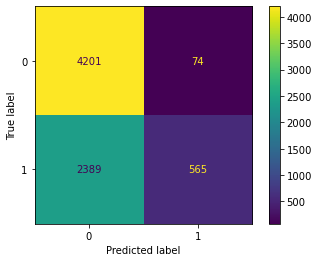

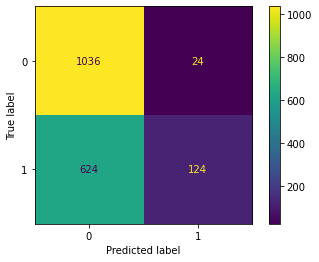

In [52]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_scaled,y_train1)
y_pred_nb = nb.predict(x_test_scaled)
print('training classification report\n',classification_report(y_train1,nb.predict(x_train_scaled)))
print('testing classification report\n',classification_report(y_test1,y_pred_nb))
plot_confusion_matrix(nb,x_train_scaled,y_train1)
plot_confusion_matrix(nb,x_test_scaled,y_test1)

In [53]:
from  xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train_scaled,y_train)
y_pred_xgb = xgb.predict(x_test_scaled)
print('R2 for training',svm.score(x_train_scaled,y_train))
print('R2 for testing',svm.score(x_test_scaled,y_test))
print('MAPE for training',mean_absolute_percentage_error(y_train, xgb.predict(x_train_scaled)))
print('MAPE for testing',mean_absolute_percentage_error(y_test, y_pred_xgb))
print('MSE for training',mean_squared_error(y_train, xgb.predict(x_train_scaled)))
print('MSE for testing',mean_squared_error(y_test, y_pred_xgb))

xgb_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred_xgb, 1)})
xgb_dataframe



R2 for training 0.9689926854643894
R2 for testing 0.8945997224315521
MAPE for training 7.388055182378782e-06
MAPE for testing 1.4260851780022763e-05
MSE for training 7.532253534808411e-09
MSE for testing 1.3159541905713832e-07


,Actual,Predicted
1922,3.5,3.5
1318,4.2,4.2
4787,3.3,3.3
2115,3.2,3.2
5689,3.2,3.2
...,...,...
6068,3.9,3.9
3245,4.0,4.0
5327,4.1,4.1
1111,3.1,3.1


In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}
grid_search = GridSearchCV(xgb,param_grid=param_grid,cv=3)
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=-1,
                                    grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_threshold=64, max_cat_to_onehot=4,
                                    max_delta_step=0, max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [56]:
final_xgb_model = grid_search.best_estimator_
final_xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [57]:
final_xgb_model.fit(x_train_scaled,y_train)
y_pred_final_xgb_model = final_xgb_model.predict(x_test_scaled)
print('R2 for training',final_xgb_model.score(x_train_scaled,y_train))
print('R2 for testing',final_xgb_model.score(x_test_scaled,y_test))
print('MAPE for training',mean_absolute_percentage_error(y_train, final_xgb_model.predict(x_train_scaled)))
print('MAPE for testing',mean_absolute_percentage_error(y_test, y_pred_final_xgb_model))
print('MSE for training',mean_squared_error(y_train, final_xgb_model.predict(x_train_scaled)))
print('MSE for testing',mean_squared_error(y_test, y_pred_final_xgb_model))
xgb_final_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred_final_xgb_model, 1)})
xgb_final_dataframe

R2 for training 0.9999999959067449
R2 for testing 0.9999999974717662
MAPE for training 3.23619558497308e-06
MAPE for testing 3.0695860647280067e-06
MSE for training 7.61607899527572e-10
MSE for testing 4.632187469783398e-10


,Actual,Predicted
1922,3.5,3.5
1318,4.2,4.2
4787,3.3,3.3
2115,3.2,3.2
5689,3.2,3.2
...,...,...
6068,3.9,3.9
3245,4.0,4.0
5327,4.1,4.1
1111,3.1,3.1


In [83]:
xgb_final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1808 entries, 1922 to 8763
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     1808 non-null   float64
 1   Predicted  1808 non-null   float32
dtypes: float32(1), float64(1)
memory usage: 35.3 KB


In [82]:
xgb_final_dataframe[xgb_final_dataframe['Actual'] != xgb_final_dataframe['Predicted']]

,Actual,Predicted
1318,4.2,4.2
4787,3.3,3.3
2115,3.2,3.2
5689,3.2,3.2
8149,3.1,3.1
...,...,...
6415,4.1,4.1
3794,4.2,4.2
6068,3.9,3.9
5327,4.1,4.1


<AxesSubplot:xlabel='rate'>

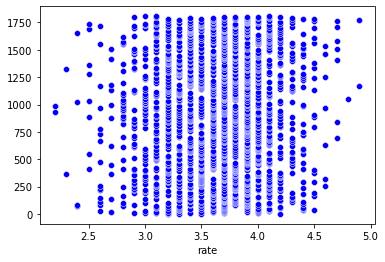

In [126]:
sns.scatterplot(x=y_test, y=range(len(y_test)), color='red')
sns.scatterplot(x=y_pred_final_xgb_model, y=range(len(y_test)), color='blue')

### deep learning

In [127]:
# x = df.drop('rate', axis=1)
# y = df['rate']
# cat = df.select_dtypes(include='object').columns
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(drop='first')
# df_final = ohe.fit_transform(x[cat]).toarray()
# x = np.concatenate([df_final, dtt], axis=1) 
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2, random_state= 42)

In [128]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [129]:
y

0       4.1
1       4.1
2       3.8
3       3.7
4       3.8
       ... 
9032    2.5
9033    3.2
9034    3.8
9035    3.3
9036    2.5
Name: rate, Length: 9037, dtype: float64

In [130]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler(with_mean=False)
# x_train_scaled_deep = scaler.fit_transform(x_train)
# x_test_scaled_deep = scaler.transform(x_test)

In [131]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from  tensorflow.keras import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers 

In [148]:
t_model = Sequential()
t_model.add(layers.Dense(100, activation="relu", input_shape=(x_train_scaled.shape[1],)))
t_model.add(layers.Dense(30, activation="relu"))
t_model.add(layers.Dense(1))


In [149]:
t_model.compile(
    loss="mean_squared_error",
    optimizer=optimizers.experimental.RMSprop(learning_rate=0.01),
    metrics=[metrics.mape])

In [150]:
t_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               31600     
                                                                 
 dense_10 (Dense)            (None, 30)                3030      
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 34,661
Trainable params: 34,661
Non-trainable params: 0
_________________________________________________________________


In [151]:
history = t_model.fit(
    x_train_scaled,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2)
    

Epoch 1/100
181/181 [==============================] - 1s 3ms/step - loss: 0.8767 - mean_absolute_percentage_error: 15.9586 - val_loss: 0.7623 - val_mean_absolute_percentage_error: 21.5418
Epoch 2/100
181/181 [==============================] - 0s 2ms/step - loss: 0.2775 - mean_absolute_percentage_error: 10.5611 - val_loss: 0.2601 - val_mean_absolute_percentage_error: 10.4579
Epoch 3/100
181/181 [==============================] - 0s 2ms/step - loss: 0.1944 - mean_absolute_percentage_error: 8.6162 - val_loss: 0.1183 - val_mean_absolute_percentage_error: 6.7817
Epoch 4/100
181/181 [==============================] - 0s 2ms/step - loss: 0.1364 - mean_absolute_percentage_error: 7.4177 - val_loss: 0.1455 - val_mean_absolute_percentage_error: 8.4868
Epoch 5/100
181/181 [==============================] - 0s 2ms/step - loss: 0.1070 - mean_absolute_percentage_error: 6.5961 - val_loss: 0.0735 - val_mean_absolute_percentage_error: 4.2399
Epoch 6/100
181/181 [==============================] - 0s 2ms

In [152]:
t_model.evaluate(x_test_scaled, y_test)

57/57 [==============================] - 0s 1ms/step - loss: 0.0049 - mean_absolute_percentage_error: 1.2655


[0.004881689324975014, 1.2654865980148315]

In [154]:
t_model.metrics_names

['loss', 'mean_absolute_percentage_error']

In [155]:
deep_pred = t_model.predict(x_test_scaled)

57/57 [==============================] - 0s 2ms/step


In [156]:
final_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(deep_pred.flatten(), 1)})

In [157]:
final_dataframe

,Actual,Predicted
1922,3.5,3.5
1318,4.2,4.1
4787,3.3,3.3
2115,3.2,3.2
5689,3.2,3.2
...,...,...
6068,3.9,3.9
3245,4.0,4.0
5327,4.1,4.1
1111,3.1,3.1


### fill **'rate'** values 

In [224]:
df_test

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
72,0,0,NEW,0,Quick Bites,"(North Indian,)",150,Delivery,Banashankari
75,0,0,NEW,0,"Takeaway, Delivery","(Street Food, Fast Food)",500,Delivery,Banashankari
84,0,0,NEW,0,Quick Bites,"(South Indian, Chinese)",100,Delivery,Banashankari
90,0,0,NEW,0,Delivery,"(Bakery, Desserts)",500,Delivery,Banashankari
91,0,0,NEW,0,"Takeaway, Delivery","(South Indian,)",400,Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...
51578,0,0,NEW,0,Quick Bites,"(Arabian, Chinese, North Indian)",500,Dine-out,Whitefield
51579,0,0,NEW,0,Food Court,"(Arabian,)",600,Dine-out,Whitefield
51587,1,0,NEW,0,Quick Bites,"(North Indian, Chinese)",300,Dine-out,Whitefield
51627,0,0,NEW,0,Quick Bites,"(North Indian,)",300,Dine-out,Whitefield


In [67]:
import joblib 
joblib.dump(final_xgb_model,'../models/regModel.pkl')

['../models/regModel.pkl']

In [225]:
%time
model = joblib.load('../models/regModel.pkl')
model

CPU times: total: 0 ns
Wall time: 0 ns


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [226]:
df_test_predict = df_test.drop('rate', axis=1).copy()
cat = df_test_predict.select_dtypes(include='object').columns

In [227]:
df_test_predict

,online_order,book_table,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
72,0,0,0,Quick Bites,"(North Indian,)",150,Delivery,Banashankari
75,0,0,0,"Takeaway, Delivery","(Street Food, Fast Food)",500,Delivery,Banashankari
84,0,0,0,Quick Bites,"(South Indian, Chinese)",100,Delivery,Banashankari
90,0,0,0,Delivery,"(Bakery, Desserts)",500,Delivery,Banashankari
91,0,0,0,"Takeaway, Delivery","(South Indian,)",400,Delivery,Banashankari
...,...,...,...,...,...,...,...,...
51578,0,0,0,Quick Bites,"(Arabian, Chinese, North Indian)",500,Dine-out,Whitefield
51579,0,0,0,Food Court,"(Arabian,)",600,Dine-out,Whitefield
51587,1,0,0,Quick Bites,"(North Indian, Chinese)",300,Dine-out,Whitefield
51627,0,0,0,Quick Bites,"(North Indian,)",300,Dine-out,Whitefield


In [229]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb2 = MultiLabelBinarizer()
df_test_mlb = mlb2.fit_transform(df_test_predict['cuisines'])
df_test_mlb = pd.DataFrame(df_test_mlb, columns=mlb2.classes_)


In [230]:
df_test_mlb

,Afghan,American,Andhra,Arabian,Asian,Assamese,BBQ,Bakery,Bar Food,Bengali,...,Sandwich,Seafood,South Indian,Steak,Street Food,Tamil,Tea,Thai,Tibetan,Turkish
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
mlb1.classes_

array([' Afghan', ' Afghani', ' African', ' American', ' Andhra',
       ' Arabian', ' Asian', ' Assamese', ' Awadhi', ' BBQ', ' Bakery',
       ' Bar Food', ' Belgian', ' Bengali', ' Beverages', ' Bihari',
       ' Biryani', ' British', ' Bubble Tea', ' Burger', ' Burmese',
       ' Cafe', ' Cantonese', ' Charcoal Chicken', ' Chettinad',
       ' Chinese', ' Coffee', ' Continental', ' Desserts', ' Drinks Only',
       ' European', ' Fast Food', ' Finger Food', ' French', ' German',
       ' Goan', ' Greek', ' Grill', ' Gujarati', ' Healthy Food',
       ' Hot dogs', ' Hyderabadi', ' Ice Cream', ' Indonesian',
       ' Iranian', ' Italian', ' Japanese', ' Jewish', ' Juices',
       ' Kashmiri', ' Kebab', ' Kerala', ' Konkan', ' Korean',
       ' Lebanese', ' Lucknowi', ' Maharashtrian', ' Malaysian',
       ' Mangalorean', ' Mediterranean', ' Mexican', ' Middle Eastern',
       ' Mithai', ' Modern Indian', ' Momos', ' Mongolian', ' Mughlai',
       ' Naga', ' Nepalese', ' North Eastern

In [232]:
diff_mlb = set(mlb1.classes_) - set(mlb2.classes_)

In [234]:
len(diff_mlb)

58

In [235]:
diff_mlb2 = set(mlb2.classes_) - set(mlb1.classes_)
diff_mlb2

{' Indian',
 ' Malwani',
 ' South American',
 'Bar Food',
 'Belgian',
 'Drinks Only'}

In [181]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
df_test_predict = ohe.fit_transform(df_test_predict[cat]).toarray()


In [182]:
df_test_predict = pd.DataFrame(df_test_predict, columns=ohe.get_feature_names_out())


In [183]:
df_test_predict

,"rest_type_Bakery, Beverage Shop","rest_type_Bakery, Cafe","rest_type_Bakery, Dessert Parlor","rest_type_Bakery, Kiosk","rest_type_Bakery, Quick Bites","rest_type_Bakery, Sweet Shop",rest_type_Bar,"rest_type_Bar, Cafe","rest_type_Bar, Casual Dining",rest_type_Beverage Shop,...,listed_in(city)_Koramangala 7th Block,listed_in(city)_Lavelle Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
